In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [2]:
np.random.seed(43)
X, y = make_circles(n_samples=500, factor = 0.1, noise = 0.35, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [3]:
X.shape

(500, 2)

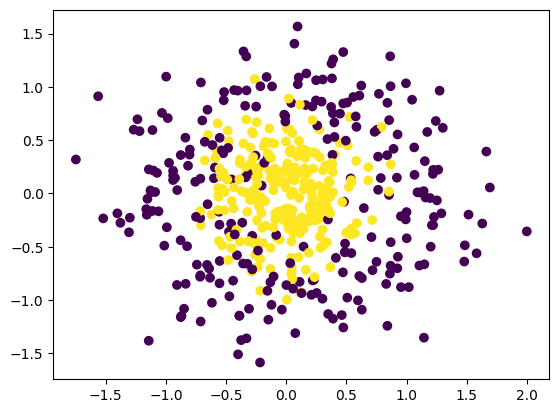

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier

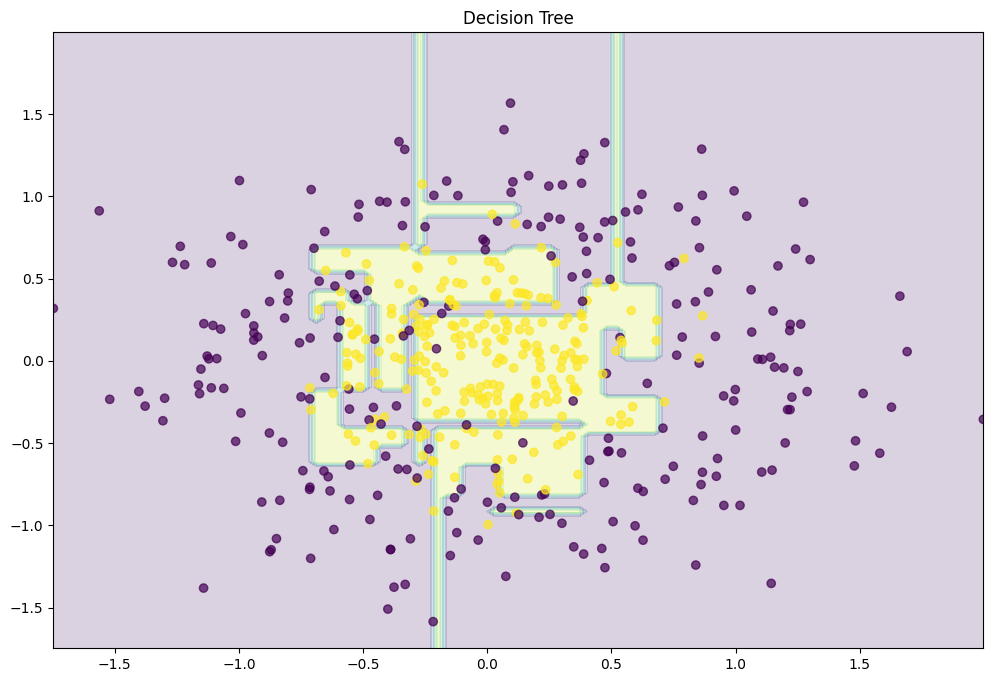

In [32]:
#Using Decision Tree
dtree = DecisionTreeClassifier(random_state=43)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat= dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.contourf(xx1, xx2, y_hat.reshape(xx1.shape), alpha = 0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'viridis', alpha = 0.7)
plt.title("Decision Tree")
plt.show()

In [29]:
#Using Random forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

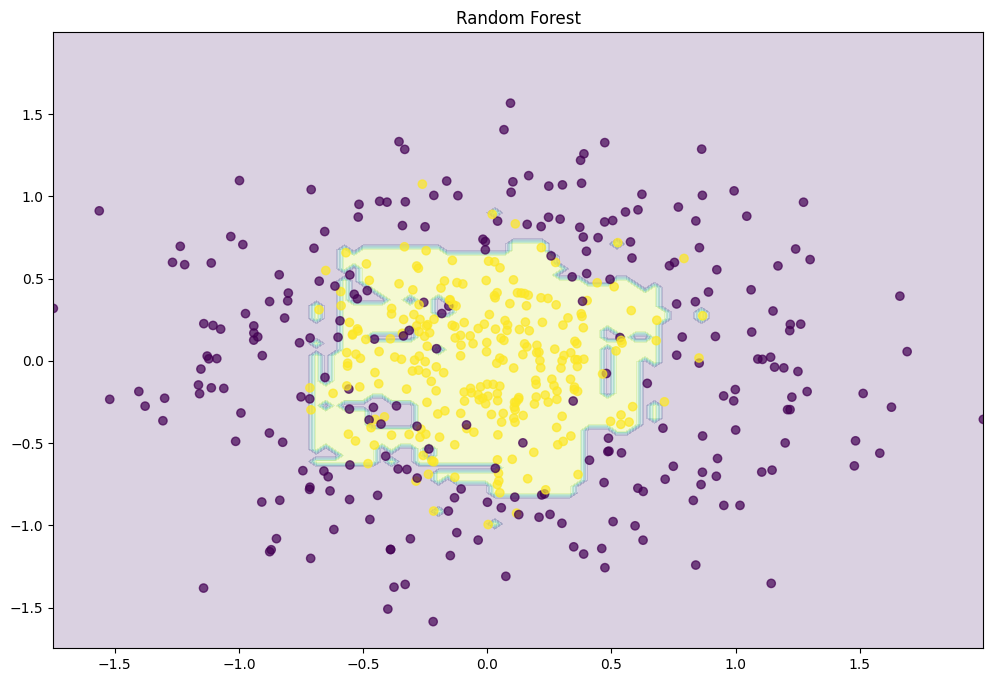

In [33]:
rf = RandomForestClassifier(n_estimators=500, random_state=43)
rf.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat= rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.contourf(xx1, xx2, y_hat.reshape(xx1.shape), alpha = 0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'viridis', alpha = 0.7)
plt.title("Random Forest")
plt.show()

In [34]:
#ON REGRESSION

In [41]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x-2)**2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 -5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples = n_train, noise = noise)
X_test, y_test = generate(n_samples = n_test, noise = noise)

(-5.0, 5.0)

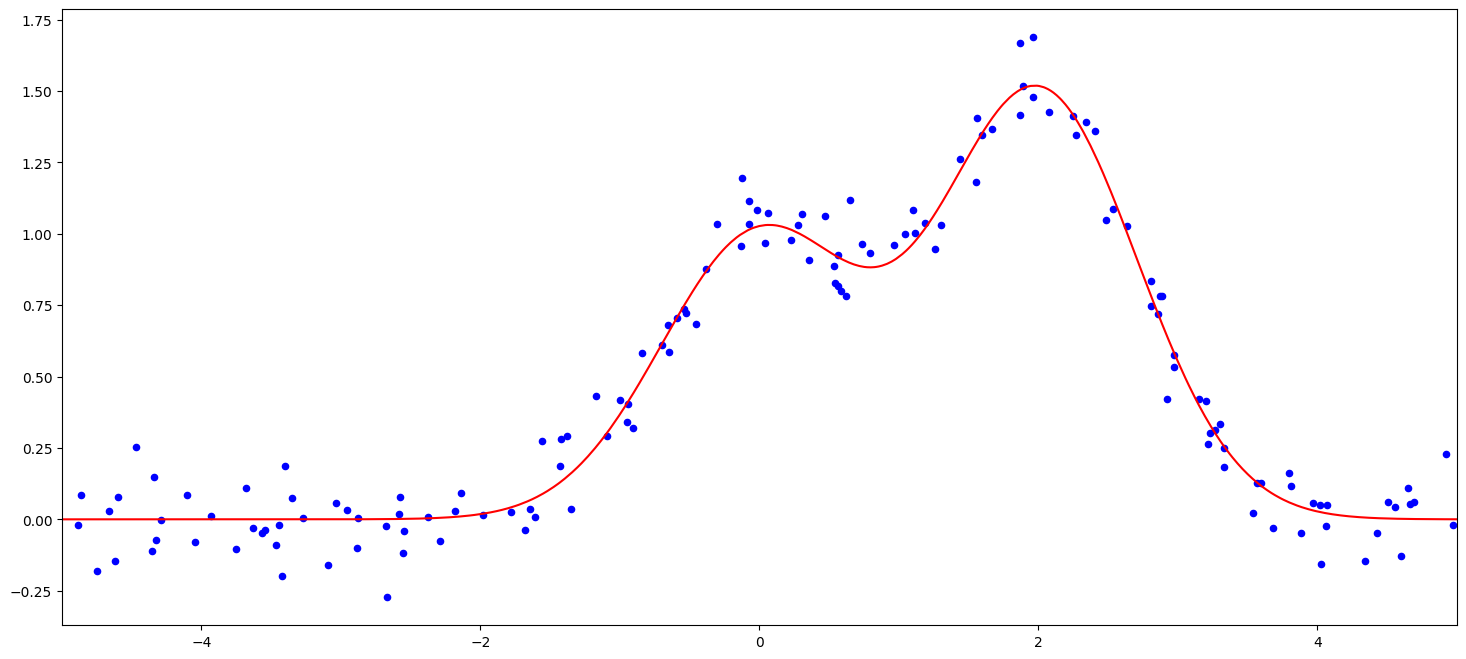

In [42]:
plt.figure(figsize= (18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c = "b", s = 20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 19.63')

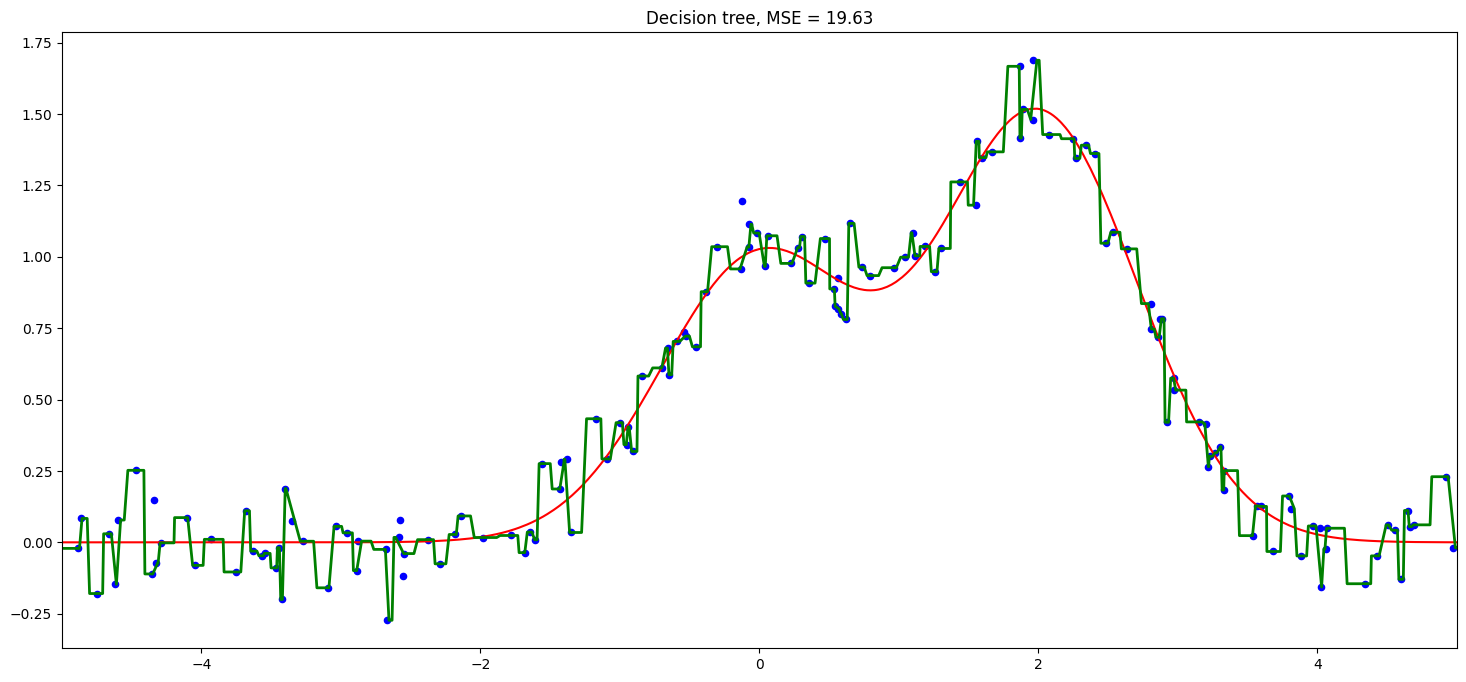

In [43]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c = "b", s = 20)
plt.plot(X_test, d_predict, "g", lw = 2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" % np.sum((y_test -d_predict)**2))

Text(0.5, 1.0, 'Decision tree, MSE = 14.22')

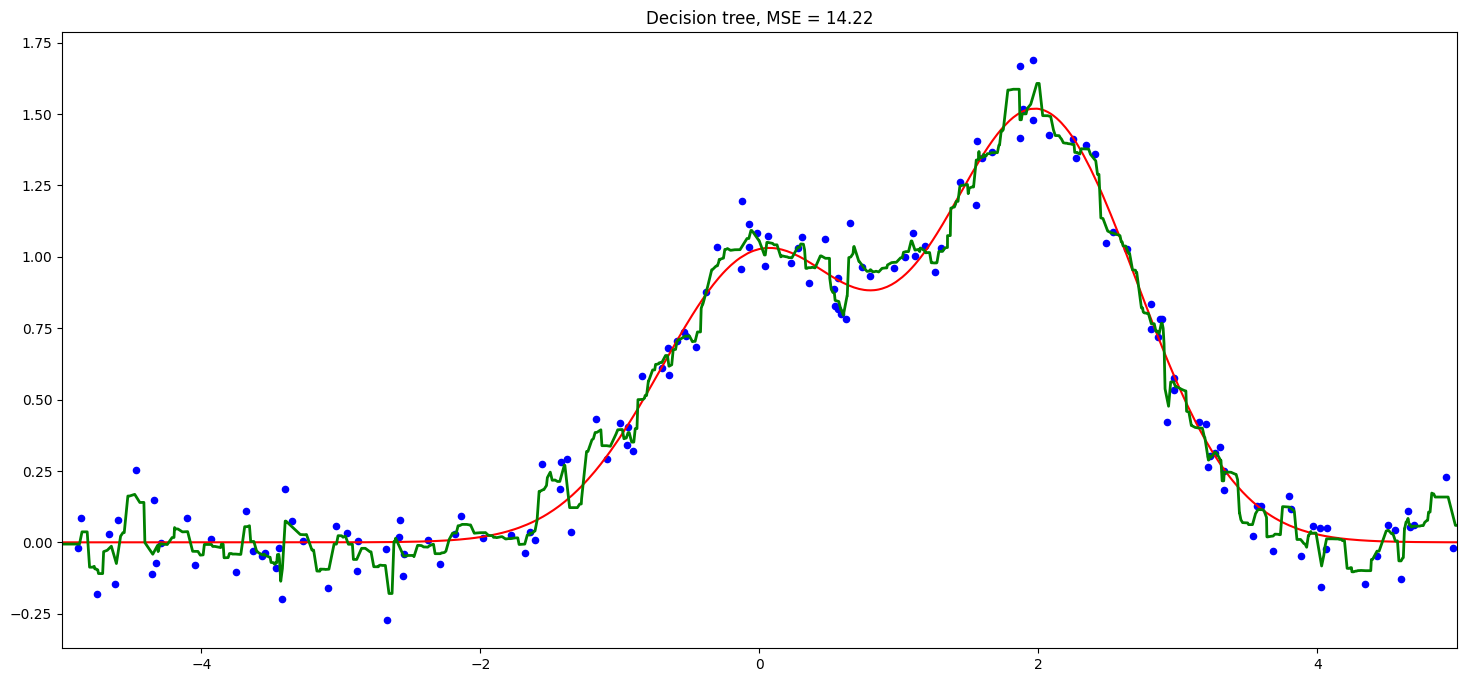

In [45]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c = "b", s = 20)
plt.plot(X_test, rf_predict, "g", lw = 2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" % np.sum((y_test -rf_predict)**2))